#<b> __TASK - 2 Data Science And Business Analysis Internship__ - July'2021

##<b>By Sneha Pisal Intern at The Sparks Foundation
    
  <b>Dataset Used : Iris dataset ,which is available in sklearn library.  

<b>TASK - Predict the optimum no. of clusters and represent it visually


In [1]:
#importing required libraries 

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data and looking at the first five rows of the data
data=pd.read_csv("C:/Users/DELL/Desktop/iris.csv")
data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


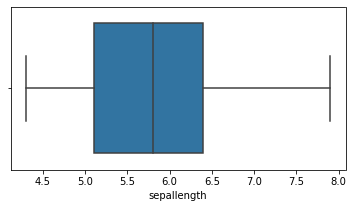

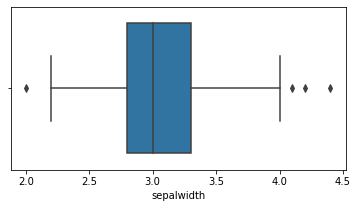

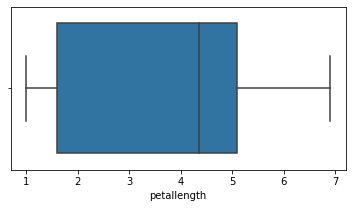

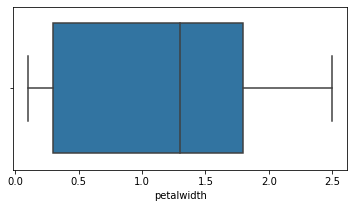

In [5]:
#Check for any outliers in the numeric data
for i in data.columns:
    if data[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(data[i])
        plt.show()

In [6]:
#Treating outliers in sepalwidth column
q1=np.percentile(data['sepalwidth'],25)
q3=np.percentile(data['sepalwidth'],75)
iqr=q3-q1
low_lim=q3-(1.5*iqr)
up_lim=q3+(1.5*iqr)
data['sepalwidth']=data['sepalwidth'].apply(lambda x: up_lim if x>up_lim else  low_lim if x<low_lim else x)

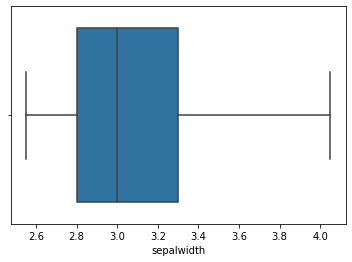

In [7]:
sns.boxplot(data['sepalwidth'])

In [8]:
#Understanding the data

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64


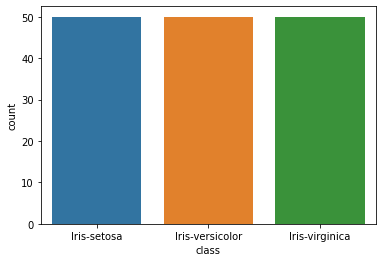

In [9]:
print(data['class'].value_counts())
sns.countplot(data['class'])

In [10]:
#statistics of the data
data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.073333,3.758667,1.198667
std,0.828066,0.386243,1.764420,0.763161
min,4.300000,2.550000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [11]:
data.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.141467,0.871754,0.817954
sepalwidth,-0.141467,1.000000,-0.456166,-0.392084
petallength,0.871754,-0.456166,1.000000,0.962757
petalwidth,0.817954,-0.392084,0.962757,1.000000


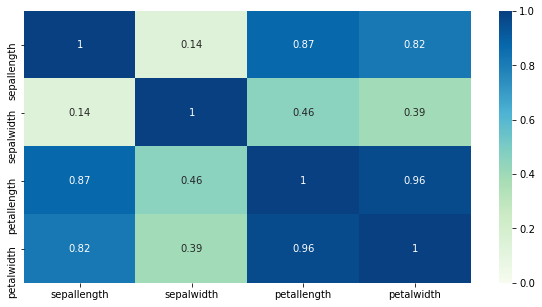

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()),cmap='GnBu',annot=True,vmin=0,vmax=1)

In [13]:
#KMeans Clustering

In [14]:
from sklearn.cluster import KMeans

In [15]:
#defining the kmeans function with initialization as k-means++
kmeans=KMeans(n_clusters=2, init='k-means++', random_state=0)

#fitting of k means algorithm on data
kmeans.fit(data.iloc[:,[0,1,2,3]])

KMeans(n_clusters=2, random_state=0)

In [16]:
#inertia on the fitted data
kmeans.inertia_

147.39091616417045

Text(0, 0.5, 'Inertia')

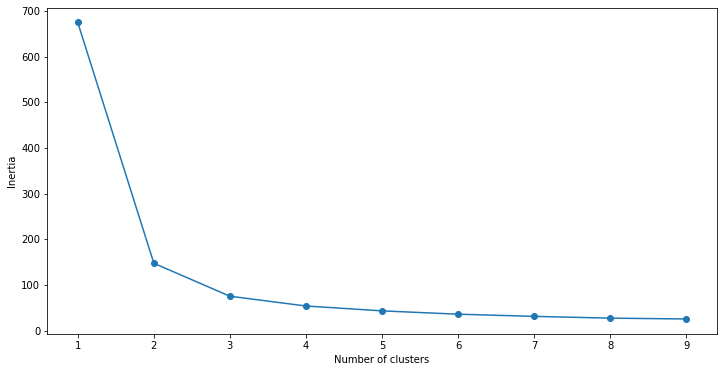

In [17]:
#fitting multiple kmeans algorithms and storing the values in the empty list
SSE=[]
for cluster in range(1,10):
    kmeans=KMeans(n_jobs=-1 ,n_clusters=cluster, init='k-means++')
    kmeans.fit(data.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

#converting the results into dataframe and plotting them
frame=pd.DataFrame({'cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['cluster'],frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [18]:
#Here we get optimum no. of clusters(3) using elbow method 

In [19]:
#k means using 3 clusters and k-means++ initialization
kmeans=KMeans(n_jobs=-1 ,n_clusters=3, init='k-means++')
kmeans.fit(data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_    

array([[5.9016129 , 2.79919355, 4.39354839, 1.43387097],
       [5.006     , 3.412     , 1.464     , 0.244     ],
       [6.85      , 3.075     , 5.74210526, 2.07105263]])

In [20]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [21]:
data['cluster']=kmeans.labels_
data

,sepallength,sepalwidth,petallength,petalwidth,class,cluster
0,5.1,3.50,1.4,0.2,Iris-setosa,1
1,4.9,3.00,1.4,0.2,Iris-setosa,1
2,4.7,3.20,1.3,0.2,Iris-setosa,1
3,4.6,3.10,1.5,0.2,Iris-setosa,1
4,5.0,3.60,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,Iris-virginica,2
146,6.3,2.55,5.0,1.9,Iris-virginica,0
147,6.5,3.00,5.2,2.0,Iris-virginica,2
148,6.2,3.40,5.4,2.3,Iris-virginica,2


In [22]:
display(data['cluster'].value_counts(),data['class'].value_counts())

0    62
1    50
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [23]:
#Representing clusters visually

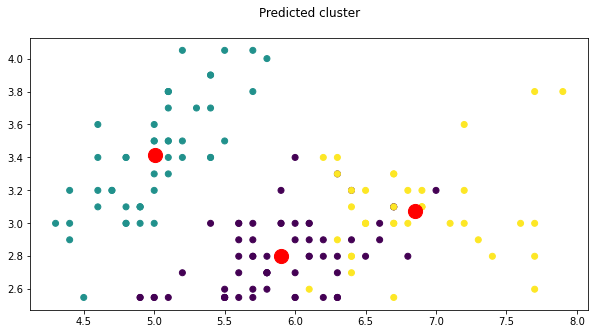

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(data['sepallength'],data['sepalwidth'], c=data.cluster)
plt.title('Predicted cluster\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='centroids')
plt.show()